In [13]:
from Bio import SeqIO, SeqUtils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### GC состав

Будем отсавлять риды, где для любого нуклеотида Phred Quality Score >=20, так как это означает, что с 99% вероятностью нуклеотид прочитан верно, т.е. у него хорошее качество. 

In [14]:
def choose_reads(fn): # оставляем только те риды, у которых все нуклеотиды имеют качество PHRED не менее 20
    choose_reads = (record for record in SeqIO.parse(fn, 'fastq') if min(record.letter_annotations['phred_quality']) >= 20)
    SeqIO.write(choose_reads, 'chosen_reads.fastq', 'fastq')
def calculating_GC(fn):
    percent_GC=[]
    num_of_reads=[]
    for record in SeqIO.parse(fn, 'fastq'):
        percent= SeqUtils.GC(record.seq)
        if percent not in percent_GC:
            num_of_reads.append(1)
            percent_GC.append(percent)
        else:
            for i in range(len(percent_GC)):
                if(percent==percent_GC[i]):
                    num_of_reads[i]+=1
    return percent_GC, num_of_reads

***100x.1.fastq***

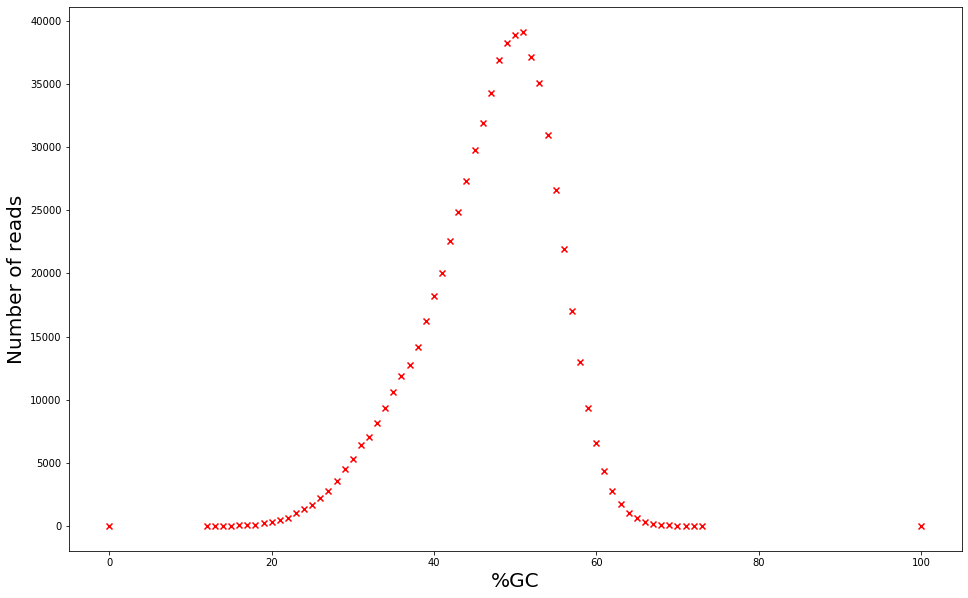

In [15]:
choose_reads('/media/USB/100x.1.fastq')
percent_GC, num_of_reads=calculating_GC('chosen_reads.fastq')
plt.figure(figsize=(16, 10))
plt.ylabel('Number of reads', fontsize=20)
plt.xlabel('%GC', fontsize=20)
plt.scatter(percent_GC, num_of_reads, c='r', marker='x')

=> GC состав равен примерно 50%

***100x.2.fastq***

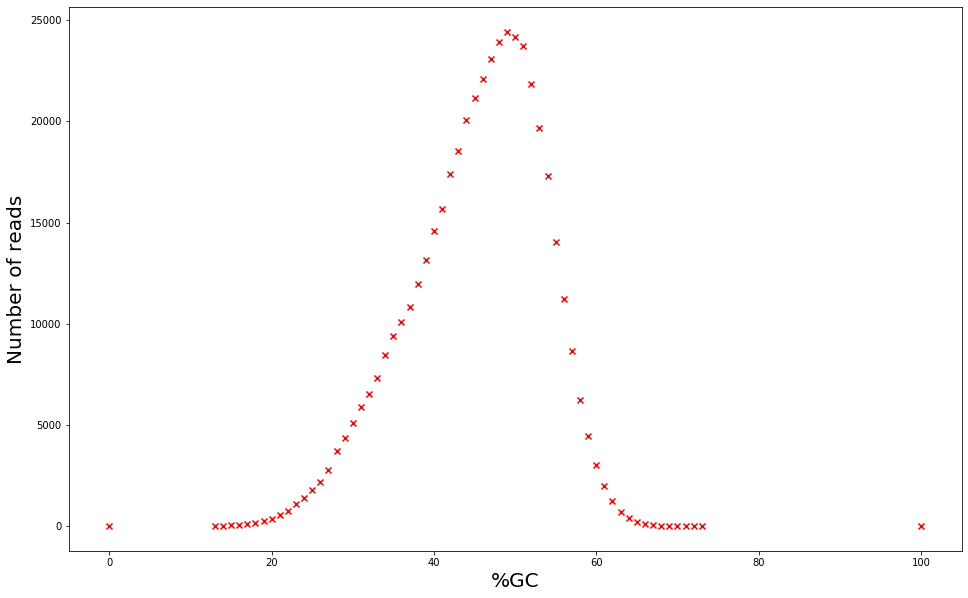

In [11]:
choose_reads('/media/USB/100x.2.fastq')
percent_GC, num_of_reads=calculating_GC('chosen_reads.fastq')
plt.figure(figsize=(16, 10))
plt.ylabel('Number of reads', fontsize=20)
plt.xlabel('%GC', fontsize=20)
plt.scatter(percent_GC, num_of_reads, c='r', marker='x')

=> GC состав равен примерно 50%

### Спектры k-меров

Будем считать спектр 2-меров

In [30]:
def calc_num_of_reads(fn):
    num_of_reads=np.zeros(16)
    for record in SeqIO.parse(fn, 'fastq'):
        for i in range(len(record.seq)):
            if(i!=len(record.seq)-1):
                if(record.seq[i]=='A' and record.seq[i+1]=='A'):
                    num_of_reads[0]+=1
                if(record.seq[i]=='A' and record.seq[i+1]=='C'):
                    num_of_reads[1]+=1
                if(record.seq[i]=='A' and record.seq[i+1]=='G'):
                    num_of_reads[2]+=1
                if(record.seq[i]=='A' and record.seq[i+1]=='T'):
                    num_of_reads[3]+=1
                if(record.seq[i]=='C' and record.seq[i+1]=='A'):
                    num_of_reads[4]+=1
                if(record.seq[i]=='C' and record.seq[i+1]=='C'):
                    num_of_reads[5]+=1
                if(record.seq[i]=='C' and record.seq[i+1]=='G'):
                    num_of_reads[6]+=1
                if(record.seq[i]=='C' and record.seq[i+1]=='T'):
                    num_of_reads[7]+=1
                if(record.seq[i]=='G' and record.seq[i+1]=='A'):
                    num_of_reads[8]+=1
                if(record.seq[i]=='G' and record.seq[i+1]=='C'):
                    num_of_reads[9]+=1
                if(record.seq[i]=='G' and record.seq[i+1]=='G'):
                    num_of_reads[10]+=1
                if(record.seq[i]=='G' and record.seq[i+1]=='T'):
                    num_of_reads[11]+=1
                if(record.seq[i]=='T' and record.seq[i+1]=='A'):
                    num_of_reads[12]+=1
                if(record.seq[i]=='T' and record.seq[i+1]=='C'):
                    num_of_reads[13]+=1
                if(record.seq[i]=='T' and record.seq[i+1]=='G'):
                    num_of_reads[14]+=1
                if(record.seq[i]=='T' and record.seq[i+1]=='T'):
                    num_of_reads[15]+=1
    return num_of_reads       

***100x.1.fastq***

In [33]:
two_mers=np.arange(1,17,1)
choose_reads('/media/USB/100x.1.fastq')
num_of_reads=calc_num_of_reads('chosen_reads.fastq')

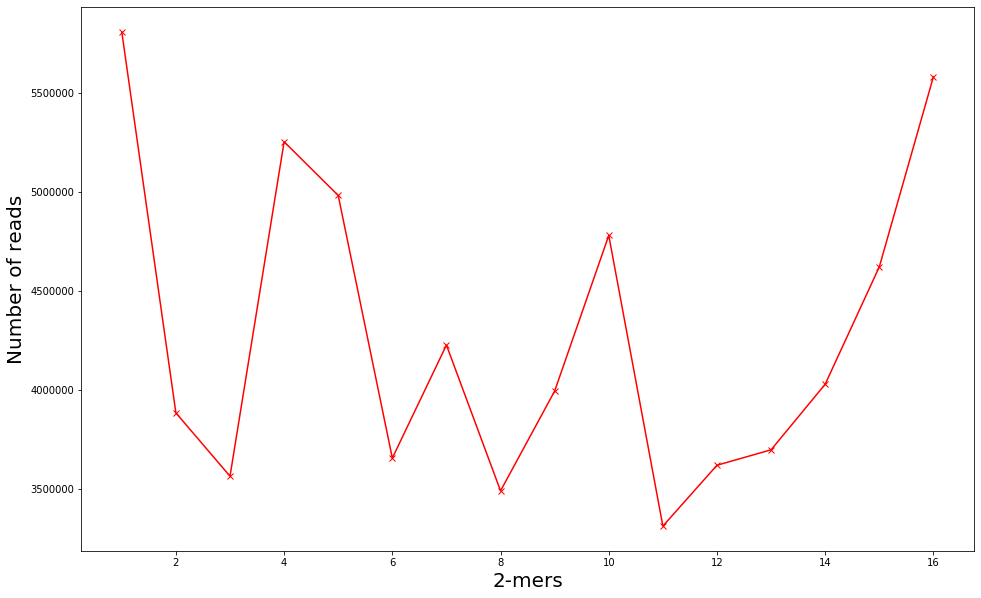

In [32]:
plt.figure(figsize=(16, 10))
plt.ylabel('Number of reads', fontsize=20)
plt.xlabel('2-mers', fontsize=20)
plt.plot(two_mers, num_of_reads, c='r', marker='x')

***100x.2.fastq***

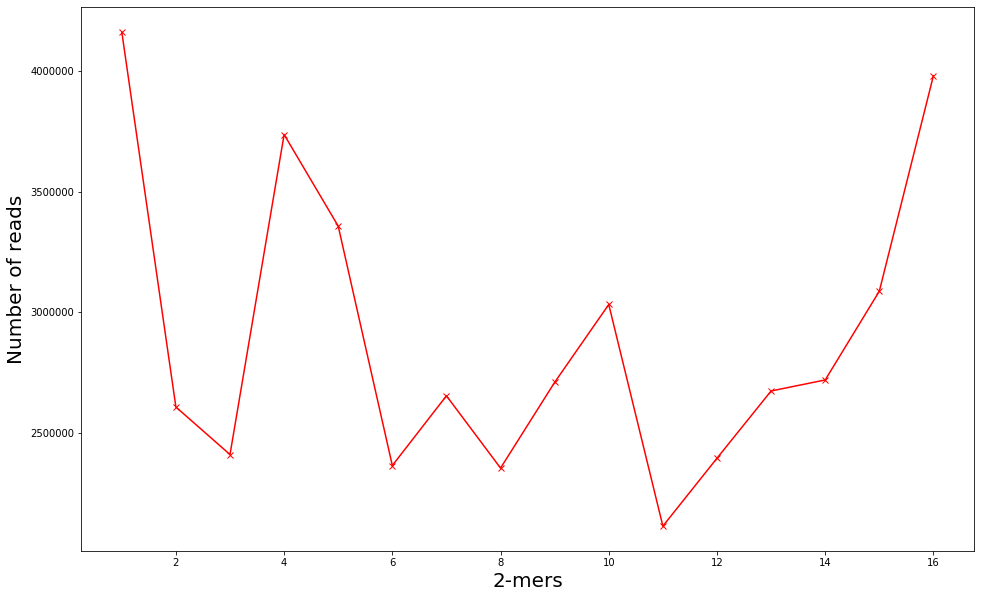

In [34]:
two_mers=np.arange(1,17,1)
choose_reads('/media/USB/100x.2.fastq')
num_of_reads=calc_num_of_reads('chosen_reads.fastq')
plt.figure(figsize=(16, 10))
plt.ylabel('Number of reads', fontsize=20)
plt.xlabel('2-mers', fontsize=20)
plt.plot(two_mers, num_of_reads, c='r', marker='x')